In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prettytable import PrettyTable
import re

pd.set_option("display.float_format", "{:.2f}".format)

# **Loading Data**

In [2]:
df=pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding='ISO-8859-1')

# **Understand the Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.00,Music,T-Series,20082,India,IN,Music,...,2000000.00,2006.00,Mar,13.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.00,Mar,5.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
2,3,MrBeast,166000000,28368841870.00,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.00,2012.00,Feb,20.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.00,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.00,2006.00,Sep,1.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
4,5,SET India,159000000,148000000000.00,Shows,SET India,116536,India,IN,Entertainment,...,1000000.00,2006.00,Sep,20.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


In [5]:
df.shape

(995, 28)

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# **Data Cleaning**

In [7]:
df.duplicated().sum()

0

In [8]:
df[-df.duplicated()].shape[0]

995

In [9]:
NaNnumerical=df.select_dtypes(include=['float64','int64']).columns
NaNcategorical=df.select_dtypes(include=['object']).columns
df[NaNnumerical]=df[NaNnumerical].fillna(0)
df[NaNcategorical]=df[NaNcategorical].fillna('Unknown')

In [10]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [11]:
df.columns=df.columns.str.replace('_',' ').str.title()
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'VideoViews', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'ChannelType', 'VideoViewsRank',
       'CountryRank', 'ChannelTypeRank', 'VideoViewsForTheLast30Days',
       'LowestMonthlyEarnings', 'HighestMonthlyEarnings',
       'LowestYearlyEarnings', 'HighestYearlyEarnings',
       'SubscribersForLast30Days', 'CreatedYear', 'CreatedMonth',
       'CreatedDate', 'GrossTertiaryEducationEnrollment(%)', 'Population',
       'UnemploymentRate', 'UrbanPopulation', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
df = df.astype({
    'VideoViews': 'int64',
    'VideoViewsRank': 'int64',
    'CountryRank': 'int64',
    'ChannelTypeRank': 'int64',
    'VideoViewsForTheLast30Days': 'int64',
    'SubscribersForLast30Days': 'int64',
    'CreatedYear': 'int64',
    'Population': 'int64',
    'UrbanPopulation': 'int64'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 995 non-null    int64  
 1   Youtuber                             995 non-null    object 
 2   Subscribers                          995 non-null    int64  
 3   VideoViews                           995 non-null    int64  
 4   Category                             995 non-null    object 
 5   Title                                995 non-null    object 
 6   Uploads                              995 non-null    int64  
 7   Country                              995 non-null    object 
 8   Abbreviation                         995 non-null    object 
 9   ChannelType                          995 non-null    object 
 10  VideoViewsRank                       995 non-null    int64  
 11  CountryRank                     

In [13]:
df[df['VideoViews']== 0]

,Rank,Youtuber,Subscribers,VideoViews,Category,Title,Uploads,Country,Abbreviation,ChannelType,...,SubscribersForLast30Days,CreatedYear,CreatedMonth,CreatedDate,GrossTertiaryEducationEnrollment(%),Population,UnemploymentRate,UrbanPopulation,Latitude,Longitude
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,0,2006,Mar,5.00,88.20,328239523,14.70,270663028,37.09,-95.71
5,6,Music,119000000,0,Unknown,Music,0,Unknown,Unknown,Music,...,0,2013,Sep,24.00,0.00,0,0.00,0,0.00,0.00
12,13,Gaming,93600000,0,Unknown,Gaming,0,Unknown,Unknown,Games,...,0,2013,Dec,15.00,0.00,0,0.00,0,0.00,0.00
18,19,Sports,75000000,0,Unknown,sports,3,United States,US,Entertainment,...,0,2006,Jan,30.00,88.20,328239523,14.70,270663028,37.09,-95.71
102,103,News,36300000,0,Unknown,News,0,Unknown,Unknown,Unknown,...,0,2013,Sep,9.00,0.00,0,0.00,0,0.00,0.00
173,174,Popular on YouTube,29300000,0,Unknown,Popular on Youtube,3,Unknown,Unknown,Education,...,0,2017,Aug,7.00,0.00,0,0.00,0,0.00,0.00
360,361,Minecraft - Topic,20900000,0,Unknown,Minecraft - Topic,0,Unknown,Unknown,Games,...,300000,2013,Dec,20.00,0.00,0,0.00,0,0.00,0.00
592,593,Live,16100000,0,Unknown,Live,0,Unknown,Unknown,Unknown,...,0,2015,Jan,13.00,0.00,0,0.00,0,0.00,0.00


In [14]:
df=df[df['VideoViews']!= 0]

In [15]:
df[(df['CreatedYear']== 0) | (df['CreatedYear']==1970)] 

,Rank,Youtuber,Subscribers,VideoViews,Category,Title,Uploads,Country,Abbreviation,ChannelType,...,SubscribersForLast30Days,CreatedYear,CreatedMonth,CreatedDate,GrossTertiaryEducationEnrollment(%),Population,UnemploymentRate,UrbanPopulation,Latitude,Longitude
101,102,YouTube,36300000,3010784935,News & Politics,YouTube,744,United States,US,Entertainment,...,300000,1970,Jan,1.00,88.20,328239523,14.70,270663028,37.09,-95.71
236,237,Chris Brown,25200000,15520569496,Music,ChrisBrown,0,Unknown,Unknown,Unknown,...,0,0,Unknown,0.00,0.00,0,0.00,0,0.00,0.00
468,469,Good Mythical Morning,18300000,8798044678,Entertainment,Goodmythicalmorning,0,Unknown,Unknown,Unknown,...,0,0,Unknown,0.00,0.00,0,0.00,0,0.00,0.00
508,509,The Game Theorists,17600000,3752347262,Gaming,TheGameTheorists,0,Australia,AU,Unknown,...,0,0,Unknown,0.00,113.10,25766605,5.27,21844756,-25.27,133.78
735,736,LEGENDA FUNK,14500000,2440718089,Music,LegendaFUNK,0,Brazil,BR,Music,...,0,0,Unknown,0.00,51.30,212559417,12.08,183241641,-14.24,-51.93
762,763,Harry Styles,14400000,5689224452,People & Blogs,harrystyles,0,United States,US,Games,...,0,0,Unknown,0.00,88.20,328239523,14.70,270663028,37.09,-95.71


In [16]:
df=df[df['CreatedYear']!= 1970]
df=df[df['CreatedYear']!= 0]

In [17]:
pattern = re.compile(r'[^a-zA-Z0-9 .,]')
df['Youtuber'] = df['Youtuber'].replace(pattern, "", regex=True)
df['Title'] = df['Title'].replace(pattern, "", regex=True)

In [18]:
df.head(30)

,Rank,Youtuber,Subscribers,VideoViews,Category,Title,Uploads,Country,Abbreviation,ChannelType,...,SubscribersForLast30Days,CreatedYear,CreatedMonth,CreatedDate,GrossTertiaryEducationEnrollment(%),Population,UnemploymentRate,UrbanPopulation,Latitude,Longitude
0,1,TSeries,245000000,228000000000,Music,TSeries,20082,India,IN,Music,...,2000000,2006,Mar,13.00,28.10,1366417754,5.36,471031528,20.59,78.96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.00,88.20,328239523,14.70,270663028,37.09,-95.71
3,4,Cocomelon Nursery Rhymes,162000000,164000000000,Education,Cocomelon Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.00,88.20,328239523,14.70,270663028,37.09,-95.71
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.00,28.10,1366417754,5.36,471031528,20.59,78.96
6,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,0,2015,May,12.00,88.20,328239523,14.70,270663028,37.09,-95.71
7,8,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,0,2010,Apr,29.00,63.20,126226568,2.29,115782416,36.20,138.25
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000,2016,Jan,14.00,81.90,144373535,4.59,107683889,61.52,105.32
9,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000,2018,Apr,23.00,88.20,328239523,14.70,270663028,37.09,-95.71
10,11,Zee Music Company,96700000,57856289381,Music,Zee Music Company,8548,India,IN,Music,...,1100000,2014,Mar,12.00,28.10,1366417754,5.36,471031528,20.59,78.96
11,12,WWE,96000000,77428473662,Sports,WWE,70127,United States,US,Sports,...,600000,2007,May,11.00,88.20,328239523,14.70,270663028,37.09,-95.71


# **Feature Engineering**

In [19]:
df['AverageYearlyEarnings'] = (df['LowestYearlyEarnings']+df['HighestYearlyEarnings'])/2

# **Data Visualization**

In [20]:
temp=df[['HighestYearlyEarnings', 'Subscribers', 'VideoViews', 'Uploads','VideoViewsForTheLast30Days','SubscribersForLast30Days']].reset_index(drop=True)
temp.corr()

,HighestYearlyEarnings,Subscribers,VideoViews,Uploads,VideoViewsForTheLast30Days,SubscribersForLast30Days
HighestYearlyEarnings,1.00,0.43,0.55,0.17,0.68,0.71
Subscribers,0.43,1.00,0.83,0.09,0.30,0.30
VideoViews,0.55,0.83,1.00,0.16,0.36,0.21
Uploads,0.17,0.09,0.16,1.00,0.11,0.05
VideoViewsForTheLast30Days,0.68,0.30,0.36,0.11,1.00,0.49
SubscribersForLast30Days,0.71,0.30,0.21,0.05,0.49,1.00


/tmp/ipykernel_20/271039584.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


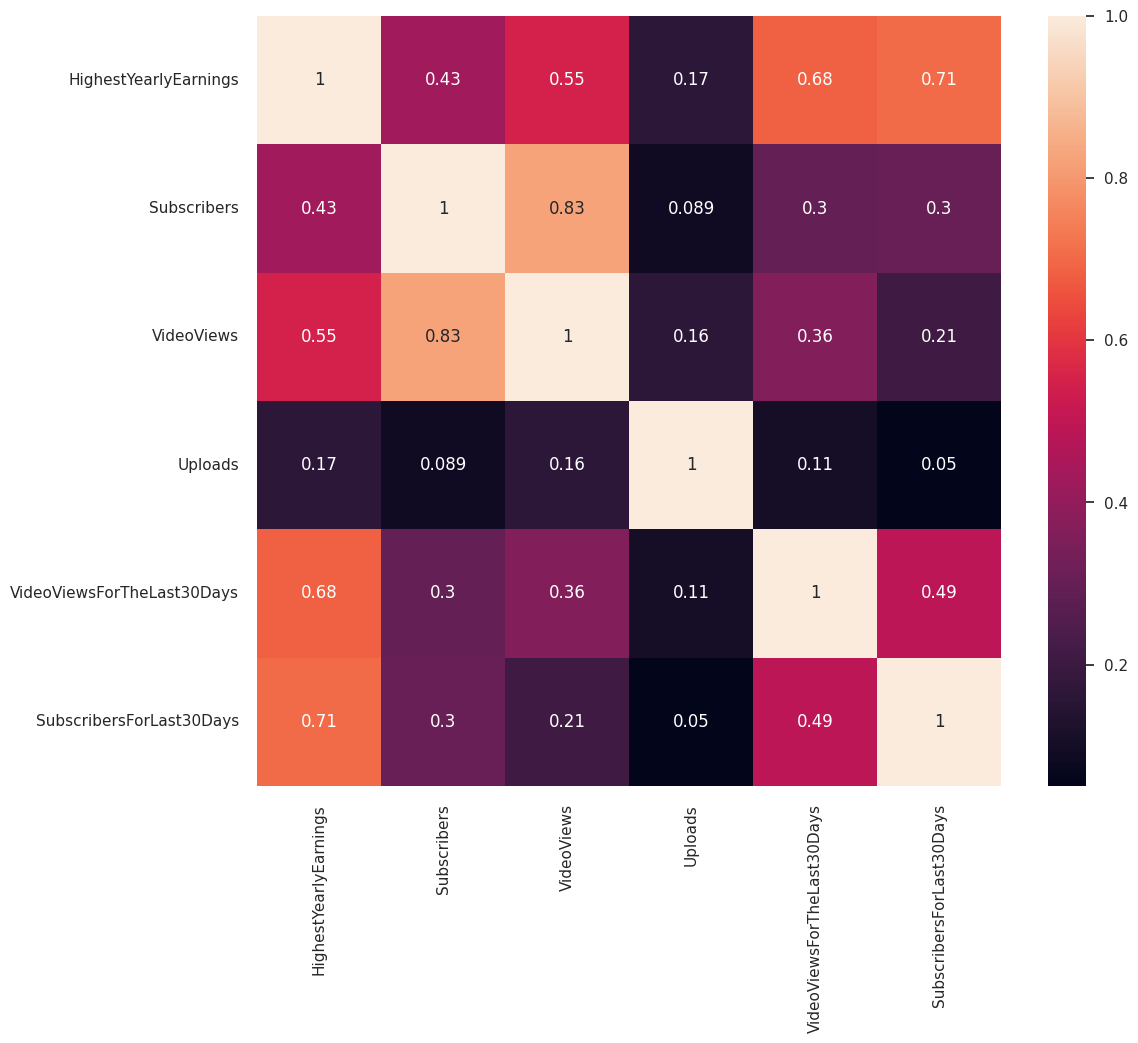

In [21]:
plt.style.use('seaborn')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(temp.corr(), annot = True)

plt.show()

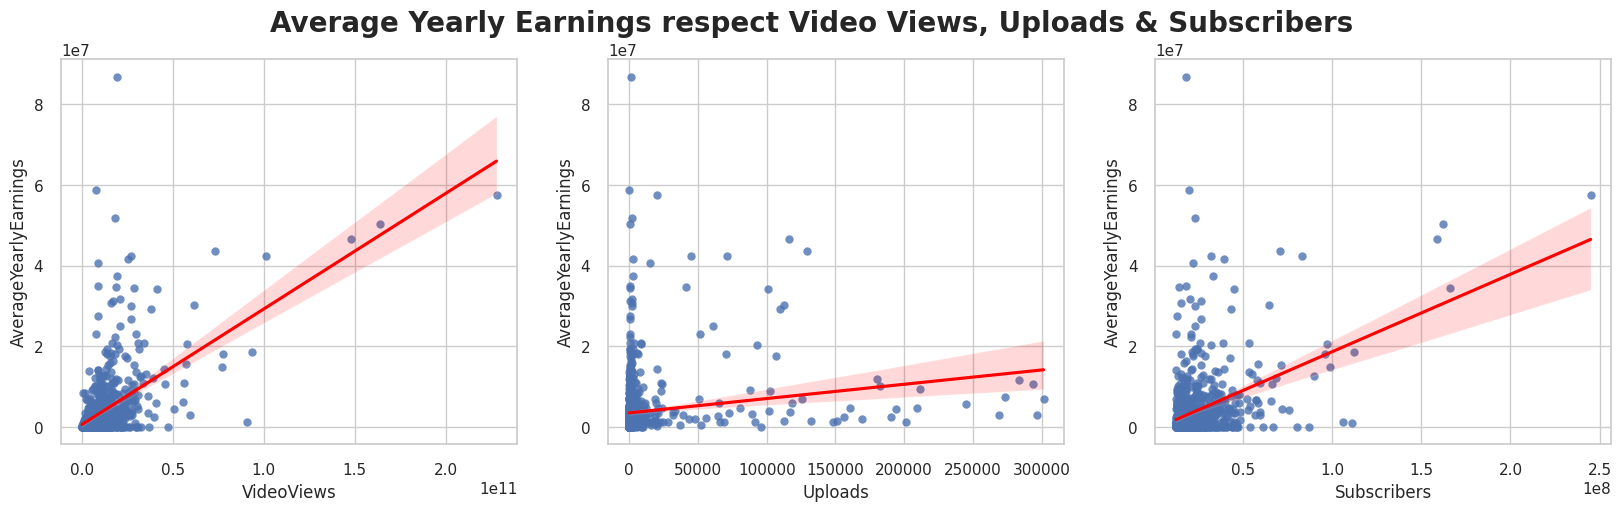

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), )

sns.regplot(ax=axs[0], data=df, x='VideoViews', y='AverageYearlyEarnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='Uploads', y='AverageYearlyEarnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=df, x='Subscribers', y='AverageYearlyEarnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

fig.suptitle('Average Yearly Earnings respect Video Views, Uploads & Subscribers', fontsize=20, fontweight='bold')
plt.show()

In [23]:
fig1 = px.scatter(df, x='VideoViews', y='AverageYearlyEarnings', trendline='ols')
fig2 = px.scatter(df, x='Uploads', y='AverageYearlyEarnings', trendline='ols')
fig3 = px.scatter(df, x='Subscribers', y='AverageYearlyEarnings', trendline='ols')


fig1.update_traces(line=dict(color='red'))
fig2.update_traces(line=dict(color='red'))
fig3.update_traces(line=dict(color='red'))


fig1.update_layout(title='<b>Correlation between Video Views & Average Yearly Earnings')
fig2.update_layout(title='<b>Correlation between Uploads & Average Yearly Earnings')
fig3.update_layout(title='<b>Correlation between Subscribers & Average Yearly Earnings')


fig1.show()
fig2.show()
fig3.show()

In [24]:
fig = px.scatter(df, x="Subscribers", y="AverageYearlyEarnings",
                 size="AverageYearlyEarnings", color="Category", size_max=60,
                 template = 'plotly_white')

lst = [0,1,2,3,4,5,6,7,8,9]
for idx in lst:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'
    
fig.update_layout(
                  xaxis=dict(title='<b>Subscribers',titlefont_size=16),
                  yaxis=dict(title='<b>Average Yearly Earnings',title_font_size=16),
                  title="<b>Categories with Video Views and Yearly Earnings",
                  title_font_size=20
)

fig.show()

In [25]:
temp=df[['Youtuber','Subscribers','ChannelType','HighestYearlyEarnings',  'VideoViews',
         'VideoViewsForTheLast30Days','Uploads','SubscribersForLast30Days','AverageYearlyEarnings']].reset_index(drop=True)
temp=temp.sort_values(by='AverageYearlyEarnings', ascending=False).head(10)

fig = px.bar(temp, x='Youtuber', y='AverageYearlyEarnings',
             #labels={'count':'Store Qty'},
             color='Youtuber'
            )
fig.update_layout(
             yaxis_title = '<b>Average Yearly Earnings',
             xaxis_title = '<b>Youtuber',
             title='<b>Average Yearly Earnings by Youtuber<b>',
             title_font_size = 20,
             showlegend=False,
             )

fig.show()

In [26]:
temp=df[['Youtuber','Subscribers','ChannelType','HighestYearlyEarnings',  'VideoViews',
         'VideoViewsForTheLast30Days','Uploads','SubscribersForLast30Days','AverageYearlyEarnings']].reset_index(drop=True)
temp=temp.sort_values(by='Subscribers', ascending=False)[:10]

fig = px.bar(temp, x='Youtuber', y='Subscribers',
             #labels={'count':'Store Qty'},
             color='Youtuber'
            )
fig.update_layout(
             yaxis_title = '<b>Subscribers',
             xaxis_title = '<b>Youtuber',
             title='<b>Subscribers by Youtuber<b>',
             title_font_size = 20,
             showlegend=False,
             )

fig.show()

In [27]:
ChanType=df.groupby('Category')['Subscribers'].sum().sort_values(ascending=False).head(10)

fig = px.bar(ChanType, x=ChanType.index, y='Subscribers',
             color=ChanType.index
            )

fig.update_layout(
             yaxis_title = '<b>Subscribers',
             xaxis_title = '<b>Category',
             title='<b>Subscribers by Category - Top 10<b>',
             title_font_size = 20,
             showlegend=False,
             )
fig.update_xaxes(tickangle=45)
fig.update_traces(hovertemplate='%{x}<br>Subscriber: %{y:,.2f}<extra></extra>')
fig.show()

In [28]:
ChanType=df.groupby('Category')['VideoViews'].sum().sort_values(ascending=False).head(10)

fig = px.bar(ChanType, x=ChanType.index, y='VideoViews',
             color=ChanType.index
            )

fig.update_layout(
             yaxis_title = '<b>VideoViews',
             xaxis_title = '<b>Category',
             title='<b>VideoViews by Category - Top 10<b>',
             title_font_size = 20,
             showlegend=False,
             )
fig.update_xaxes(tickangle=45)
fig.update_traces(hovertemplate='%{x}<br>VideoViews: %{y:,.2f}<extra></extra>')
fig.show()

In [29]:
g=df['Country'].value_counts().reset_index()[:10]

fig = px.pie(g,values='count',
             names='Country',
             width=600,
             height=600,
             color='Country',
)
fig.update_layout(
             
             title= "<b>Youtuber by Country<b>",
             title_font_size = 20,
              showlegend=False,
)

fig.update_traces(textposition='inside', textinfo='percent+label',
                 marker=dict( line=dict(color='#000000', width=1))
                 )

fig.show()

In [30]:
temp = df['Category'].value_counts().reset_index()
temp = temp[temp['Category'] != 'Unknown'][:10]

graf = go.Figure(data=[go.Pie(
    labels=temp['Category'],
    values=temp['count'],
    hole=0.25,
    textinfo="label+percent",
    marker=dict(
       # colors=tema  # Asegúrate de definir 'tema' adecuadamente para especificar los colores
    )
)])

graf.update_layout(
    title='<b>Top 10 Categories',title_font_size=20,
    annotations=[dict(text=f"<b>TOTAL<br>{sum(temp['count'])}</b>",
                                        x=0.5, y=0.5, font_size=14,
                                        showarrow=False)],
    showlegend=False
)

graf.show()

In [31]:
columns=['VideoViews','Uploads','Subscribers','HighestYearlyEarnings']
for column in columns:
    temp = df[df['Country'] != 'Unknown']

    average_views = temp.groupby('Country')[column].mean().reset_index()
    
    fig = px.choropleth(average_views, 
                    locations="Country", 
                    locationmode='country names', 
                    color=column, 
                    color_continuous_scale=px.colors.sequential.thermal ,
                    title="<b>Average {} by Country".format(str(column)))

    fig.show()

In [32]:
YoutubeYears = df['CreatedYear'].value_counts().sort_index()

fig = go.Figure() 

fig.add_trace(go.Scatter(x=YoutubeYears.index,y=YoutubeYears.values,
        fill='tozeroy',line_color='darkred', mode='lines+markers')
)

fig.update_layout(
    title_text='<b>YouTube Channels Created by Year',
    title_font_size = 20,
    template='plotly_white',
    xaxis=dict(title='Year',titlefont_size=16),
    yaxis=dict(title='Number of Channels',titlefont_size=16),
)

fig.show()

In [33]:
fig = px.scatter(df, x='Subscribers', y='VideoViews', 
                 hover_data={'Youtuber':True,'Subscribers': True, 'VideoViews': True},
                 trendline='ols'
                )

fig.update_layout(
             yaxis_title = '<b>Video Views',
             xaxis_title = '<b>Subscribers',
             title='<b>Correlation btw Video Views & Subscriber',
             title_font_size = 20,
             showlegend=False,
             )
customdata=df[['Youtuber']]
fig.update_traces(
    hovertemplate='Youtuber: %{customdata}<br>' +'Subscribers: %{x}<br>' +
                  'Video Views: %{y:,.0f}',
    line=dict(width=3, color='red')
)

fig.show()

In [34]:
fig = px.scatter(df, x='Uploads', y='VideoViews', 
                 hover_data={'Youtuber':True,'Uploads': True, 'VideoViews': True},
                 trendline='ols'
                )

fig.update_layout(
             yaxis_title = '<b>Video Views',
             xaxis_title = '<b>Uploads',
             title='<b>Correlation btw Video Views & Uploads',
             title_font_size = 20,
             showlegend=False,
             )
customdata=df[['Youtuber']]
fig.update_traces(
    hovertemplate='Youtuber: %{customdata}<br>'+'Uploads: %{x:,.0f}<br>' +
                  'Video Views: %{y:,.0f}',
    line=dict(width=3, color='red')
)

fig.show()

In [35]:
fig = go.Figure(data=go.Scatter3d(
    x=df['Subscribers'],
    y=df['VideoViews'],
    z=df['Uploads'],
    mode='markers',
    marker=dict(size=8,color=df['Subscribers'],colorscale='Viridis',
        opacity=0.7)
))

fig.update_layout(title='YouTube Channels: Subscribers, Video Views, and Uploads',
                   scene=dict(xaxis_title='Subscribers', yaxis_title='Video Views', zaxis_title='Uploads'),
                   margin=dict(l=0, r=0, b=0, t=30))
fig.show()

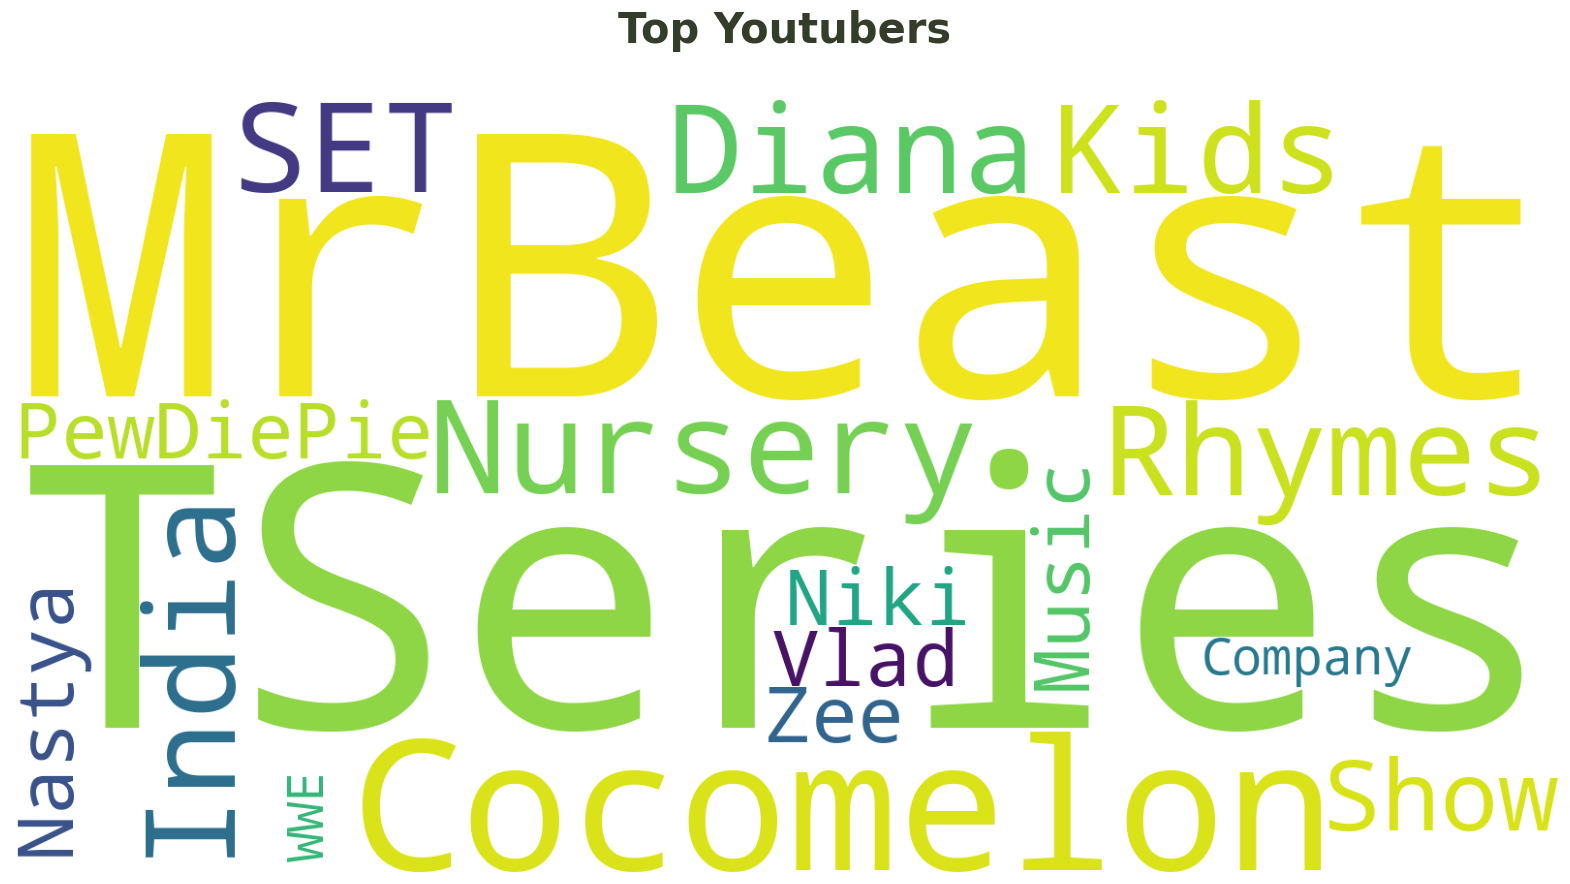

In [36]:
plt.figure(figsize=(20,20))
plt.title('Top Youtubers\n', fontsize=30, weight=600, color='#333d29')

wc = WordCloud(max_words=700, min_font_size=30,
                height=800,width=1600,background_color="white").generate(' '.join(df['Youtuber'][:10]))

plt.axis('off')
plt.imshow(wc)